Nota: La base de datos ha sido generada artificialmente y es utilizada exclusivamente con fines educativos. Fue tomada de la siguiente dirección: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [122]:
import pandas as pd
from scipy import stats

df = pd.read_csv('/content/StudentsPerformance.csv')
df[0:10]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [123]:
df.columns = ['gender','ethnicity','parental_education','lunch','test_preparation_course','math_score',
              'reading_score','writing_score']

## Análisis Descriptivo

## Valores posibles de cada variable

**Género:**

In [ ]:
# @title
df.gender.unique()


array(['female', 'male'], dtype=object)

**Etnia:**

In [ ]:
# @title
df.ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

**Educacion Alcanzada por los Padres:**

In [ ]:
# @title
df.parental_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

**Tipo de almuerzo:**

In [ ]:
# @title
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

**Estado de realizacion del curso de preparacion:**

In [ ]:
# @title
df.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

## Rangos de cada variable

In [ ]:
# @title
print('Rango de notas en matematicas:')
df.math_score.min(),df.math_score.max()

Rango de notas en matematicas:


(0, 100)

In [ ]:
# @title
print('Rango de notas en escritura:')
df.writing_score.min(),df.writing_score.max()

Rango de notas en escritura:


(10, 100)

In [ ]:
# @title
print('Rango de notas en lectura:')
df.reading_score.min(),df.reading_score.max()

Rango de notas en lectura:


(17, 100)

## Medidas de posicion y dispersion de nuevas variables

**Medidas de las notas obtenidas en cada examen por las personas de género masculino**

In [ ]:
# @title
round(df[df.gender=='male'].reading_score.describe(),2)

,reading_score
count,482.00
mean,65.47
std,13.93
min,23.00
25%,56.00
50%,66.00
75%,75.00
max,100.00


In [ ]:
# @title
round(df[df.gender=='male'].math_score.describe(),2)

,math_score
count,482.00
mean,68.73
std,14.36
min,27.00
25%,59.00
50%,69.00
75%,79.00
max,100.00


In [ ]:
# @title
round(df[df.gender=='male'].writing_score.describe(),2)

,writing_score
count,482.00
mean,63.31
std,14.11
min,15.00
25%,53.00
50%,64.00
75%,73.75
max,100.00


**Medidas de las notas obtenidas en cada examen por las personas de género femenino**

In [ ]:
# @title
round(df[df.gender=='female'].reading_score.describe(),2)

,reading_score
count,518.00
mean,72.61
std,14.38
min,17.00
25%,63.25
50%,73.00
75%,83.00
max,100.00


In [ ]:
# @title
round(df[df.gender=='female'].math_score.describe(),2)

,math_score
count,518.00
mean,63.63
std,15.49
min,0.00
25%,54.00
50%,65.00
75%,74.00
max,100.00


In [ ]:
# @title
round(df[df.gender=='female'].writing_score.describe(),2)

,writing_score
count,518.00
mean,72.47
std,14.84
min,10.00
25%,64.00
50%,74.00
75%,82.00
max,100.00


## Tipos de cada variable

In [ ]:
# @title
df.dtypes

,0
gender,object
ethnicity,object
parental_education,object
lunch,object
test_preparation_course,object
math_score,int64
reading_score,int64
writing_score,int64


# Probabilidad

¿Que probabilidad hay de que un alumno haya completado el test del curso de preparacion?

In [ ]:
p_preparation_course = len(df[df.test_preparation_course == 'completed']) / len(df)
print(f'Hay un {p_preparation_course * 100}% de probabilidad de que un alumno haya completado el test del curso de preparación.')

Hay un 35.8% de probabilidad de que un alumno haya completado el test del curso de preparación.


Probabilidad de nivel de educacion alcanzada por los padres

<Axes: ylabel='parental_education'>

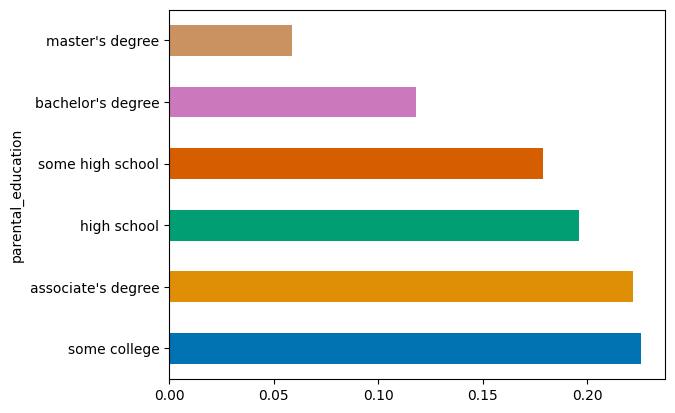

In [ ]:
nivel_padres = df['parental_education'].value_counts(normalize=True)
nivel_padres.plot(x='parental_education',y='proportion', kind='barh', color=seaborn.color_palette("colorblind"))

### Probabilidad condicional e independencia

¿Cual es la probablilidad de que la nota sea mayor o igual a 80 dado que no completo el test del curso de preparación?

¿Cual es la probabilidad de que un alumno obtenga una nota menor o igual a 40 dado que pertenece al grupo E?

¿Las variables 'nivel de educacion alcanzado por los padres: secundaria incompleta' y 'notas obtenidas en el test de lectura menor o igual a 50' son independientes?

¿Las variables 'tipo de almuerzo estandar' y 'notas obtenidas en el examen de escritura mayor o igual a 50' son independientes?

In [ ]:
# A = La nota es mayor o  igual a 80
# B = No completo el test del curso de preparacion

A = (df.math_score >= 80)
B = (df.test_preparation_course == 'none')
a_inters_b = df[ A & B ]
cond1 = len(a_inters_b)/len(df[B])
print(f'''La probablilidad de que la nota sea mayor o igual a 80 dado que
no completo el test del curso de preparación es de {round(cond1 * 100,2)}%''')

La probablilidad de que la nota sea mayor o igual a 80 dado que
no completo el test del curso de preparación es de 16.36%


In [ ]:
cond2 = len(df[(df.ethnicity == 'group E') & (df.math_score <= 40)])/len(df[df.ethnicity == 'group E'])
cond2 = round(cond2 * 100, 2)
print(f'''La probabilidad de que un alumno obtenga una nota menor o igual a 40 dado que pertenece al grupo E
es de {round(cond2 * 100,2)}%''')

La probabilidad de que un alumno obtenga una nota menor o igual a 40 dado que pertenece al grupo E
es de 286.0%


In [ ]:
'''Variables Aleatorias:
C = nivel educativo alcanzado por los padres 'secundaria incompleta'
D = notas igual o menor a 50 en el test de lectura
'''

def laplace(evento,espacio_muestral):
  return len(evento)/len(espacio_muestral)

C = (df.parental_education == 'some high school')
D = (df.reading_score <= 50)
prob_c = laplace(C,df['parental_education'])
prob_d = laplace(D, df['reading_score'])
I = laplace(df[C & D],D) == (prob_c * prob_d)
def independencia(res):
    if I:
       print('Las variables son independientes')
    else:
       print('Las variables son dependientes')

independencia(I)

Las variables son dependientes


In [ ]:
'''Variables Aleatorias:
E = tipo de almuerzo estandar'
F = 'notas obtenidas en el examen de escritura mayor o igual a 50'
'''

E = (df.lunch == 'standard')
F = (df.writing_score >= 50)
prob_e = laplace(E,df['lunch'])
prob_f = laplace(F,df['writing_score'])
x = laplace(df[E & F],F) == (prob_e * prob_f)
independencia(x)



Las variables son dependientes


# Distribuciones

### Densidad de probabilidad de variables categoricas

(0.0, 1.0)

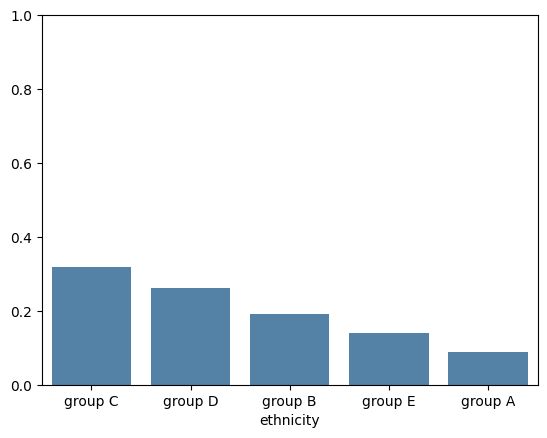

In [ ]:
info = df.ethnicity.value_counts(normalize=True)
seaborn.barplot(x=info.index, y=info.values, color='steelblue')
plt.ylim(0,1)

Es más probable que una persona pertenezca al grupo C o al grupo D que al grupo E o al grupo A

### Densidad de probabilidad de variables numericas discretas


Text(0.5, 0, 'Notas en test de matematicas')

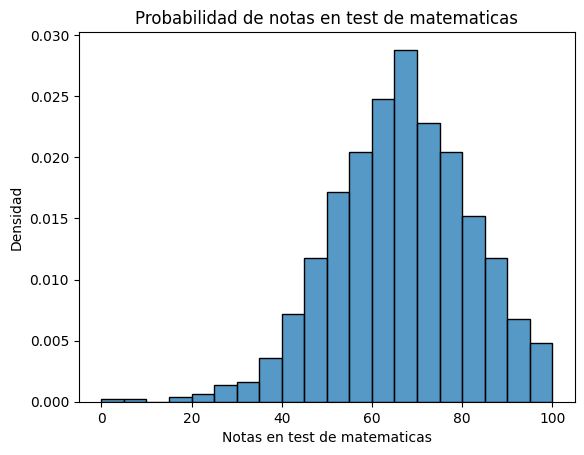

In [ ]:
seaborn.histplot(df.math_score, bins=20, kde=False, stat="density")
plt.title('Probabilidad de notas en test de matematicas')
plt.ylabel('Densidad')
plt.xlabel('Notas en test de matematicas')

Es más probable que las notas se encuentren entre 60 y 80.

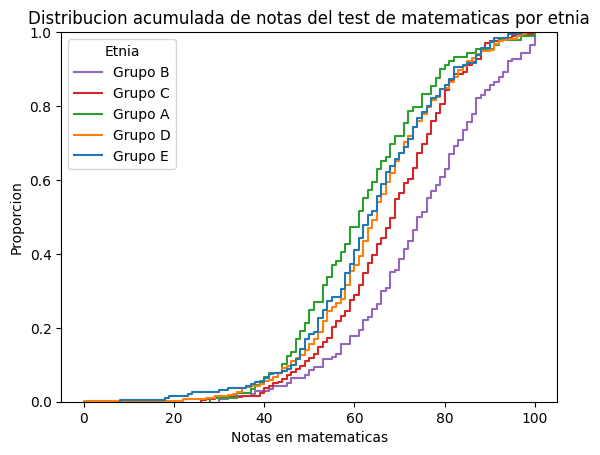

In [ ]:
seaborn.ecdfplot(df, x='math_score' , hue='ethnicity')
plt.xlabel('Notas en matematicas')
plt.ylabel('Proporcion')
plt.title('Distribucion acumulada de notas del test de matematicas por etnia')
plt.legend(['Grupo B','Grupo C', 'Grupo A', 'Grupo D', 'Grupo E'],title='Etnia')

<Axes: title={'center': 'Tests de Lectura y escritura'}, xlabel='Nota obtenida', ylabel='Frecuencia'>

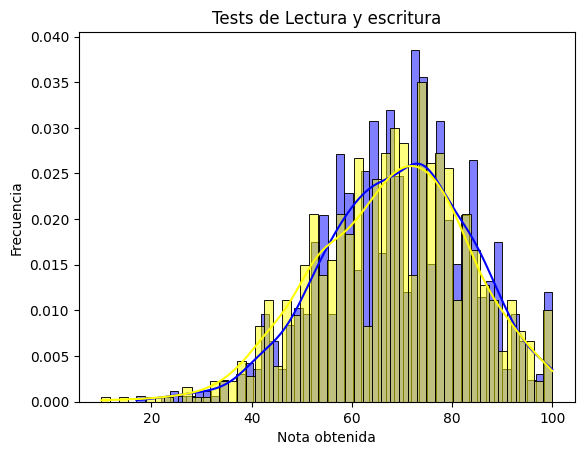

In [ ]:
plt.title('Tests de Lectura y escritura')
plt.xlabel('Nota obtenida')
plt.ylabel('Frecuencia')
seaborn.histplot(df.reading_score, bins=50, kde=True, stat="density", color="blue")
seaborn.histplot(df.writing_score, bins=50, kde=True, stat="density", color="yellow")

Las distribuciones de los tests de lectura y de escritura se asemejan mucho.

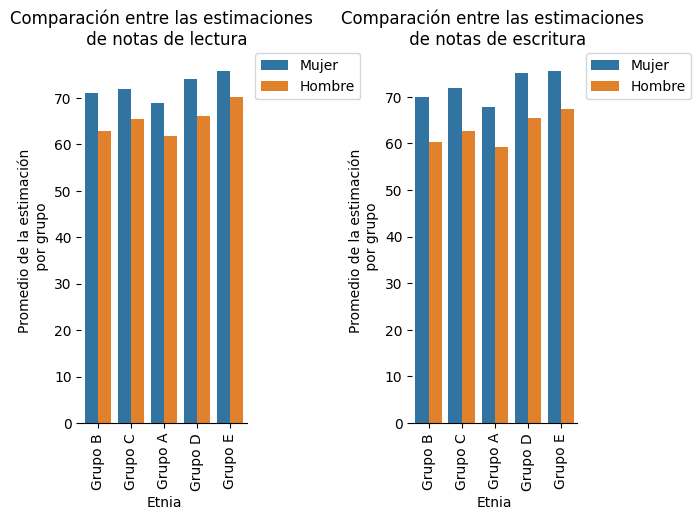

In [ ]:
def comparacion_etnia(variable_examen, materia):
    seaborn.barplot(data=df, x='ethnicity', y=variable_examen,
                hue='gender', errorbar=None)
    plt.ylabel('Promedio de la estimación \n por grupo')
    plt.xlabel('Etnia')
    plt.xticks([0,1,2,3,4],['Grupo B','Grupo C', 'Grupo A', 'Grupo D', 'Grupo E'],rotation=90)
    plt.title(f'Comparación entre las estimaciones \n de notas de {materia}')
    plt.legend(['Mujer', 'Hombre'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    seaborn.despine(left=True)
plt.subplot(1,2,1)
comparacion_etnia("reading_score", 'lectura')
plt.subplot(1,2,2)
comparacion_etnia("writing_score", 'escritura')
plt.subplots_adjust(wspace=1)


Las estimaciones de notas obtenidas en los examenes de matematicas de las personas de genero femenino fueron superiores en cada etnia.

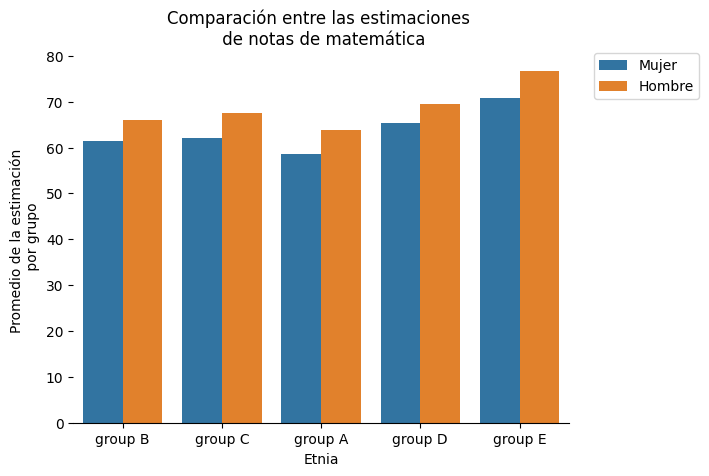

In [ ]:
comparacion_etnia("math_score", 'matemática')


En el caso de las estimaciones de notas obtenidas en el test de matemáticas se da la situacion inversa. Las personas de genero masculino obtuvieron estimaciones superiores.

([<matplotlib.axis.XTick at 0x7eda35cf0510>,
 [Text(0, 0, 'Titulo de grado'),
  Text(1, 0, 'Universitario incompleto'),
  Text(2, 0, 'Maestría'),
  Text(3, 0, 'Grado asociado'),
  Text(4, 0, 'Escuela secundaria'),
  Text(5, 0, 'Secundaria incompleta')])

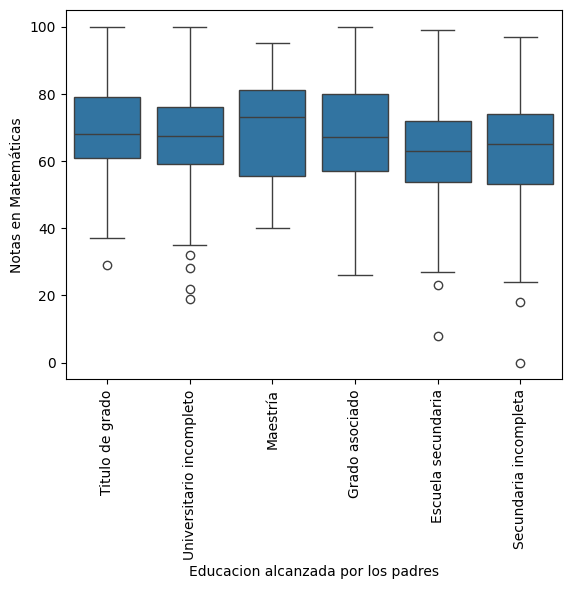

In [127]:
seaborn.boxplot(data=df,y="math_score", x='parental_education')
plt.xlabel('Educacion alcanzada por los padres')
plt.ylabel('Notas en Matemáticas')
plt.xticks([0,1,2,3,4,5],['Titulo de grado','Universitario incompleto','Maestría','Grado asociado','Escuela secundaria','Secundaria incompleta'],
                        rotation=90)


El minimo de aquellos cuyos padres obtuvieron un titulo de maestria es el mas alto, pero su máximo es el mas bajo. Ademas, es el único indicador que se encuentra más notablemente sesgado hacia la derecha.